In [117]:
# from google.colab import files
# files.upload()  # dataset_images.zip


In [118]:
# Import Libraries
import os
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from skimage.feature import hog


In [119]:
# # Extract the ZIP file
zip_path = "/content/dataset_images.zip"
extract_path = "/content/dataset_images"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [120]:
# # Define image folder paths
cat_folder = "/content/dataset_images/images_dataset/cat_images"
dog_folder = "/content/dataset_images/images_dataset/dog_images"


In [121]:
# Load images with HOG feature extraction
IMAGE_SIZE = 64

def load_images_with_hog(folder, label, max_images=1000):
    images = []
    count = 0
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))

                # Grayscale for HOG
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                features = hog(
                    gray,
                    orientations=9,
                    pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2),
                    block_norm='L2-Hys',
                    visualize=False
                )

                images.append([features, label, img])
                count += 1
                if count >= max_images:
                    break
        except:
            pass
    return images



In [122]:
# Load Cat and Dog Images
cat_images = load_images_with_hog(cat_folder, 0)
dog_images = load_images_with_hog(dog_folder, 1)


In [123]:
# Combine, Shuffle, and Split Features/Labels
data = cat_images + dog_images
np.random.shuffle(data)

X = np.array([i[0] for i in data])
y = np.array([i[1] for i in data])
images_raw = [i[2] for i in data]


In [124]:
# Train the SVM Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel='rbf', C=10, gamma='scale')
model.fit(X_train, y_train)


SVC(C=10)

In [125]:
# Evaluate the Model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7125

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.68      0.72       223
           1       0.65      0.76      0.70       177

    accuracy                           0.71       400
   macro avg       0.71      0.72      0.71       400
weighted avg       0.72      0.71      0.71       400



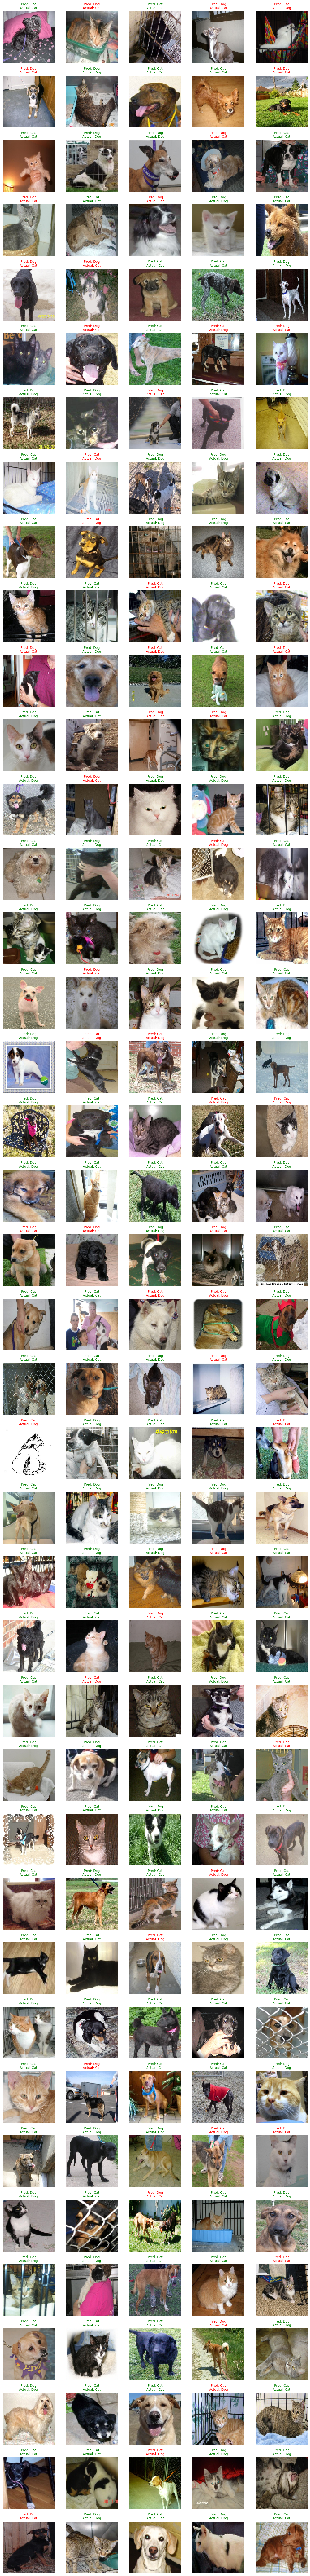

In [126]:
# Show Predictions in a Grid
label_map = {0: "Cat", 1: "Dog"}

def show_predictions_grid(num=15, columns=5):
    num = min(num, len(X_test))
    rows = num // columns + int(num % columns != 0)
    indices = np.random.choice(len(X_test), num, replace=False)

    fig, axes = plt.subplots(rows, columns, figsize=(columns * 2.5, rows * 2.5))
    axes = axes.flatten()

    for i, idx in enumerate(indices):
        img_bgr = images_raw[idx]
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

        actual = label_map[y_test[idx]]
        predicted = label_map[y_pred[idx]]
        color = 'green' if actual == predicted else 'red'
        title = f"Pred: {predicted}\nActual: {actual}"

        axes[i].imshow(img_rgb)
        axes[i].set_title(title, fontsize=9, color=color)
        axes[i].axis('off')


    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


show_predictions_grid(200)
